In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.cross_validation import  train_test_split

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import functools

In [4]:
import pymystem3
import json
import re
mystem = pymystem3.Mystem()

In [5]:
X = []
R = []
with open('dz4/big_train.csv', 'r') as f:
    print(f.readline())
    for line in f:
        data = line.strip().split(',')
        _id,context_id,label,text,likes,rating = data

        if rating == 'n/a':
            continue
        R.append(int(rating))
        X.append(text)

_id,context_id,label,text,likes,rating



In [7]:
vec = TfidfVectorizer(min_df=12, max_df=0.8)
_X = vec.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(_X, R, test_size=0.5)

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [8]:
clf = LogisticRegression(C=10)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [9]:
print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(mean_squared_error(y_true=Y_test, y_pred=Y_pred))
print(mean_absolute_error(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          1       0.58      0.49      0.53      3064
          2       0.39      0.22      0.28      2841
          3       0.39      0.30      0.33      3881
          4       0.43      0.30      0.35      6429
          5       0.80      0.94      0.87     25820

avg / total       0.66      0.70      0.67     42035

0.9242535981919828
0.4583085523968122


In [10]:
inverse_voc = {_id:word for (word,_id) in vec.vocabulary_.items()}

In [11]:
for i in range(5):
    print('Рейтинг',5-i)
    print(', '.join([inverse_voc[idx]  for idx in clf.coef_[i].argsort()[:100]])+'\n')

Рейтинг 5
вкусно, вкусные, спасибо, вполне, радует, звезды, вкусный, отличное, отличная, понравилось, целом, восторге, хорошая, очень, музыка, вкусная, вкусное, ставлю, быстро, высоте, удобно, довольна, отлично, доволен, выбор, но, достаточно, десерты, обязательно, хорошо, правда, оторваться, отличный, особенно, приятно, первые, понравился, интерьер, немного, минусов, порадовала, отличные, подарок, небольшой, часто, бывает, уютное, нареканий, рады, остальном, некоторые, лучших, тонкая, смотря, жизни, ты, восторг, сытно, респект, вежливый, хорошее, удовольствием, довольны, формата, минусы, кофейне, чисто, брать, взгляд, приветливый, нравится, хорошем, прекрасная, несмотря, помню, уютно, круто, приятные, порадовал, состояние, здорово, мир, благодаря, лучшая, читаю, твердая, пока, неплохой, всем, весьма, еще, хороший, супер, бургеры, бонусы, большинство, обожаю, гриле, касается, выпить

Рейтинг 4
обязательно, спасибо, вкусно, хорошее, рекомендую, всегда, отлично, молодцы, отличный, жизнь,

In [12]:
def preprocessing(word_sequence):
    # сливаем не и ни с предыдущим словом
    last_word = ''
    target_word = ('не','ни')
    
    for word in word_sequence:
        if last_word in target_word:
            yield last_word+'_'+word
        else:
            if not word in target_word:
                yield word
        last_word = word
        

In [14]:
[i for i in preprocessing('ни мог не приодалеть препятствие не не не нет девид блейн нет'.split())]

['ни_мог',
 'не_приодалеть',
 'препятствие',
 'не_не',
 'не_не',
 'не_нет',
 'девид',
 'блейн',
 'нет']

In [15]:
_X = [' '.join(preprocessing(text.lower().split())) for text in X]

In [16]:
vec = TfidfVectorizer(min_df=12, max_df=0.8)
_X2 = vec.fit_transform(_X)
X_train, X_test, Y_train, Y_test = train_test_split(_X2, R, test_size=0.5)

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [17]:
clf = LogisticRegression(C=10)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(mean_squared_error(y_true=Y_test, y_pred=Y_pred))
print(mean_absolute_error(y_true=Y_test, y_pred=Y_pred))

In [18]:
print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(mean_squared_error(y_true=Y_test, y_pred=Y_pred))
print(mean_absolute_error(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          1       0.57      0.51      0.54      2979
          2       0.40      0.24      0.30      2789
          3       0.41      0.29      0.34      3987
          4       0.43      0.33      0.37      6373
          5       0.81      0.94      0.87     25907

avg / total       0.67      0.71      0.68     42035

0.865350303318663
0.4408944926846675


In [19]:
inverse_voc = {_id:word for (word,_id) in vec.vocabulary_.items()}
for i in range(5):
    print('Рейтинг',5-i)
    print(', '.join([inverse_voc[idx]  for idx in clf.coef_[i].argsort()[:100]])+'\n')

Рейтинг 5
вкусные, рекомендую, вкусно, понравилось, целом, отличная, очень, вкусное, нравится, спасибо, звезды, вкусная, люблю, понравилась, понравился, вкусный, правда, уютно, вполне, приятно, советую, отличное, восторге, но, понравились, особенно, удобно, музыка, ставлю, радует, атмосфера, довольна, быстро, проблем, небольшой, интересные, высоте, здорово, обязательно, обслуживал, отличный, понять, всегда, первые, отлично, претензий, приветливый, удовольствие, немного, оторваться, не_совсем, дыхании, интересный, неудобно, действительно, супер, приятное, хорошая, хорошо, хорошем, лучших, течение, круто, достаточно, делает, полезна, подарок, замечаний, своем, легко, первой, каждого, интерьер, вернусь, выбор, скажу, не_плохо, респект, другими, приятная, любимый, каждый, подача, лучшая, кальян, здесь, вежливый, окна, порадовала, приняла, минусов, для, детства, блюда, простая, порции, отличные, некоторые, потому, прекрасно

Рейтинг 4
рекомендую, вкусно, спасибо, хорошее, обязательно, отлич

In [40]:
en_reg = ElasticNet(alpha=0.0001, l1_ratio=0.5)

In [41]:
en_reg.fit(X_train , Y_train)
Y_pred = en_reg.predict(X_test)

In [42]:
print(mean_squared_error(y_true=Y_test, y_pred=Y_pred))
print(mean_absolute_error(y_true=Y_test, y_pred=Y_pred))

0.9187469520137104
0.7248434986475798


In [43]:
zero_index = en_reg.coef_==0
nonzero_index = en_reg.coef_!=0

In [44]:
joblib.dump(nonzero_index, 'dz4_tfidf_nonzero_index_mask.pck')

['dz4_tfidf_nonzero_index_mask.pck']

In [37]:
print(', '.join([inverse_voc[idx] for idx in np.arange(len(zero_index))[zero_index][:2000]])+'\n')

000, 007, 01, 02, 033, 05, 05л, 07, 100, 1000, 1000р, 100500, 100гр, 100р, 101, 105, 109, 10ти, 110, 1100, 110р, 115, 119, 12, 120, 1200, 120р, 125, 129, 13, 130, 1300, 130р, 135, 140, 1400, 140р, 145, 146, 149, 150, 1500р, 150р, 155, 159, 16, 160, 1600, 160р, 165, 169, 17, 170, 1700, 170р, 175, 179, 180, 1800, 180р, 185, 189, 190, 1900, 1905, 190р, 1929, 195, 1984, 199, 1990, 1991, 1999, 199р, 1г, 1го, 1й, 1л, 1час, 2000, 2000р, 2001, 2002, 2003, 2005, 2006, 2007, 2009, 200гр, 200мл, 200р, 2010, 2011, 2012, 2015, 2015г, 2016г, 2017г, 2035, 205, 209, 210, 210р, 215, 220, 2200, 220р, 225, 230, 230р, 235, 24, 240, 240р, 245, 25, 250, 2500, 250гр, 250мл, 250р, 255, 26, 260, 260р, 27, 270, 270р, 275, 280, 280р, 29, 290, 290р, 295, 299, 2gis, 2г, 2гис, 2й, 2м, 2ом, 2х, 300, 3000, 300мл, 300р, 30р, 31, 310, 32, 320, 320р, 33, 330, 34, 340, 3500, 350р, 36, 360, 365, 37, 370, 38, 380, 39, 390, 390р, 395, 3d, 3й, 3х, 400, 4000, 400гр, 400мл, 400р, 40р, 41, 410, 42, 420, 43, 430, 44, 440, 45, 45

In [38]:
# _en_reg = ElasticNet(alpha=0.0001, l1_ratio=0.7)
# _en_reg.fit(X_train[:,nonzero_index] , Y_train)
# Y_pred = _en_reg.predict(X_test[:,nonzero_index])

In [39]:
# print(mean_squared_error(y_true=Y_test, y_pred=Y_pred))
# print(mean_absolute_error(y_true=Y_test, y_pred=Y_pred))

In [40]:
vec_bigramm = TfidfVectorizer(min_df=12, max_df=0.8, ngram_range=(2,2))

In [45]:
_X2 = vec_bigramm.fit_transform(_X)
X_train, X_test, Y_train, Y_test = train_test_split(_X2, R, test_size=0.5)

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [46]:
X_train.shape

(42035, 47666)

In [51]:
clf = LogisticRegression(C=10)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(mean_squared_error(y_true=Y_test, y_pred=Y_pred))
print(mean_absolute_error(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          1       0.56      0.37      0.44      3072
          2       0.39      0.20      0.27      2733
          3       0.41      0.25      0.31      4033
          4       0.40      0.27      0.32      6351
          5       0.76      0.94      0.84     25846

avg / total       0.64      0.68      0.65     42035

1.1708814083501844
0.5268942547876769


In [54]:
confusion_matrix(y_true=Y_test, y_pred=Y_pred)

array([[ 1124,   347,   333,   249,  1019],
       [  427,   559,   470,   396,   881],
       [  238,   341,   991,   830,  1633],
       [  103,   108,   438,  1714,  3988],
       [  100,    72,   198,  1104, 24372]])

In [57]:
inverse_voc = {_id:word for (word,_id) in vec_bigramm.vocabulary_.items()}
for i in range(5):
    print('Рейтинг',5-i)
    print(', '.join([inverse_voc[idx]  for idx in clf.coef_[i].argsort()[:150]])+'\n')

Рейтинг 5
очень вкусно, очень вкусные, из минусов, очень понравилось, очень вкусный, очень нравится, отличная книга, несмотря на, очень понравилась, очень вкусная, мне понравилось, хорошая книга, было бы, отдельное спасибо, очень быстро, хотелось бы, как всегда, очень приятно, единственный минус, на высоте, отличное место, рекомендую всем, как раз, очень понравился, все понравилось, книга понравилась, всем советую, остались довольны, для меня, вот это, из лучших, книга очень, всем рекомендую, еда вкусная, очень понравились, все очень, данную книгу, очень хорошее, спасибо вам, хорошее место, по делу, было очень, мне понравился, мне нравится, очень довольна, большой выбор, спасибо что, приятная атмосфера, полезная книга, претензий нет, вкусно быстро, но при, живая музыка, вкусно но, очень даже, все на, что очень, очень рекомендую, мой вкус, рада что, очень удобно, спасибо автору, от души, прекрасная книга, кажется что, порции большие, советую всем, казалось бы, снова снова, книга хорошая

In [56]:
# + 

In [6]:
def concat_important_word(word_sequence):
    # сливаем не и ни с предыдущим словом
    last_word = ''
    target_word = ('не','ни', 'очень', 'так', 'мне')
    
    for word in word_sequence:
        if last_word in target_word:
            yield last_word+'_'+word
        else:
            if not word in target_word:
                yield word
        last_word = word
        

@functools.lru_cache(maxsize=1000)
def not_cyrilic(word):
    if re.match('.+[A-Za-z]+.+', word):
        return '_not_cyrilic_'
    return word


@functools.lru_cache(maxsize=10**6)
def normalize_by_mystem(from_my_stem):
    from_my_stem = json.loads(from_my_stem)
    if not from_my_stem['text'].strip():
        return ''
    
    if 'analysis' in from_my_stem and from_my_stem['analysis']:
        try:
            return not_cyrilic(from_my_stem.get('analysis', [{}])[0].get('lex'))
        except:
            print(from_my_stem)
            raise Exception
    else:
        return not_cyrilic(from_my_stem.get('text'))
    
# @functools.lru_cache(maxsize=10**6)
def preprocessing(string):
    return ' '.join(
        i for i in 
        concat_important_word(
            map(normalize_by_mystem,
                [
                    json.dumps(j)
                    for j in mystem.analyze(string.lower())
                    if j.get('text',' ').strip()
                ]
            )
        )
    )
    

In [7]:
X_big_train = X

In [8]:
X_target = []
with open('./dz4/rating_test_without_rating.csv', 'r') as f2:
    print(f2.readline())
    for line in f2:
        X_target.append(line.strip())

_id,context_id,text



In [9]:
_X = [preprocessing(text) for text in (X_big_train+X_target)]

In [12]:
vec = TfidfVectorizer(min_df=5)

In [13]:
vec.fit(_X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [13]:
_X2 = vec.transform(X_big_train)
X_train, X_test, Y_train, Y_test = train_test_split(_X2, R, test_size=0.5)

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [10]:
from sklearn.externals import joblib
# joblib.dump(vec,'dz4_unigram_tfidf_vectorizer.pck')
# joblib.dump(_X, 'dz4_raw_data.pck')

In [14]:
joblib.dump(_X2, 'dz4_X_train.pck')

['dz4_X_train.pck']

In [12]:
vec = joblib.load('dz4_unigram_tfidf_vectorizer.pck')

In [16]:
clf = LogisticRegression(C=10, class_weight={1:5, 2:7, 3:6, 4:5, 5:0.5})
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(mean_squared_error(y_true=Y_test, y_pred=Y_pred))
print(mean_absolute_error(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          1       0.45      0.43      0.44      3095
          2       0.26      0.26      0.26      2804
          3       0.28      0.31      0.29      3948
          4       0.30      0.39      0.34      6352
          5       0.85      0.77      0.81     25836

avg / total       0.64      0.61      0.63     42035

1.1889377899369573
0.594338051623647


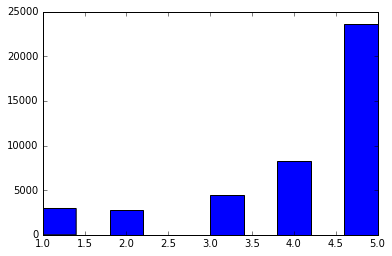

In [17]:
plt.figure()
plt.hist(Y_pred, bins=10)
plt.show()

In [18]:
inverse_voc = {_id:word for (word,_id) in vec.vocabulary_.items()}
for i in range(5):
    print('Рейтинг',5-i)
    print(', '.join([inverse_voc[idx]  for idx in clf.coef_[i].argsort()[:100]])+'\n')

Рейтинг 5
удобно, определенно, вкусный, приятно, вкусно, хороший, жизнь, любовь, небольшой, обязательно, отличный, безусловно, спасибо, сытно, 50р, радовать, самообслуживание, любитель, приветливый, оперативно, правда, концепция, раф, частенько, вновь, огонь, прошлое, крем, состояние, балл, вежливый, безумно, вынос, милый, уютно, процесс, стиль, тепло, наиболее, предостаточно, уха, атмосфера, аккуратно, наличные, жидкость, обстановка, резкий, продолжение, шикарный, респект, наслаждаться, любимая, потрясающе, особенно, жкт, фаст, неплохо, немного, поучиться, хорошо, пожелание, благодаря, удовольствие, поэтому, отец, приличный, предложение, унитаз, достойный, апельсиновый, приятный, разнообразие, ксения, история, божественно, переплет, отлично, брать, выбор, одновременно, море, быстрый, край, музыка, ресторанчик, действительность, среднее, критично, благодарность, сладкий, всегда, интерьер, большой, особый, кесадилья, поклон, хинкали, весело, ум, вполне

Рейтинг 4
обязательно, спасибо, п

In [19]:
en_reg = ElasticNet(alpha=0.0001, l1_ratio=0.5)
en_reg.fit(X_train , Y_train)
Y_pred = en_reg.predict(X_test)

In [20]:
# print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(mean_squared_error(y_true=Y_test, y_pred=Y_pred))
print(mean_absolute_error(y_true=Y_test, y_pred=Y_pred))

0.9117759645778402
0.7240743395652224


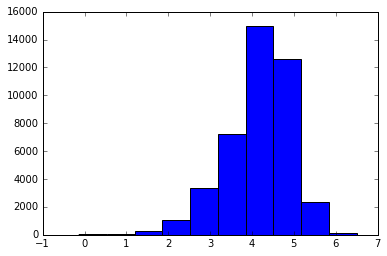

In [21]:
plt.figure()
plt.hist(Y_pred)
plt.show()

In [22]:
from sklearn.decomposition import TruncatedSVD

In [27]:
X_train.shape

(42035, 42982)

In [28]:
_svd = TruncatedSVD(n_components=1000)

In [29]:
_X_train = _svd.fit_transform(X_train)

In [30]:
joblib.dump(_svd, 'dz4_svd_from_tfidf.pck')

['dz4_svd_from_tfidf.pck']

In [20]:
_svd = joblib.load('dz4_svd_from_tfidf.pck')

In [31]:
_X_train.shape

(42035, 1000)

In [32]:
clf = LogisticRegression(C=10, class_weight={1:5, 2:7, 3:6, 4:5, 5:0.5})
clf.fit(_X_train, Y_train)
Y_pred = clf.predict(_svd.transform(X_test))
print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(mean_squared_error(y_true=Y_test, y_pred=Y_pred))
print(mean_absolute_error(y_true=Y_test, y_pred=Y_pred))

             precision    recall  f1-score   support

          1       0.41      0.43      0.42      3095
          2       0.23      0.25      0.24      2804
          3       0.26      0.28      0.27      3948
          4       0.30      0.45      0.36      6352
          5       0.86      0.74      0.79     25836

avg / total       0.64      0.59      0.61     42035

1.258831925776139
0.6217913643392411


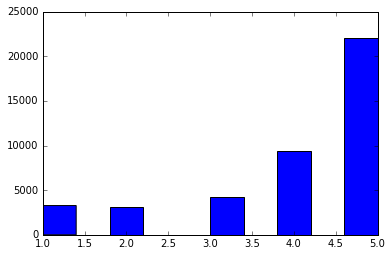

In [33]:
plt.figure()
plt.hist(Y_pred, bins=10)
plt.show()

In [67]:
# gbm = GradientBoostingClassifier(n_estimators=2000, verbose=1, max_depth=3)

In [ ]:
# gbm.fit(_X_train, Y_train)
# Y_pred = gbm.predict(_svd.transform(X_test))
# print(classification_report(y_true=Y_test, y_pred=Y_pred))
# print(mean_squared_error(y_true=Y_test, y_pred=Y_pred))
# print(mean_absolute_error(y_true=Y_test, y_pred=Y_pred))
#       Iter       Train Loss   Remaining Time 
#          1       56720.3761         1056.85m
#          2       54584.3602         1106.08m
#          3       52874.2714         1067.89m
#          4       51467.3362         1047.62m
#          5       50336.6298         1047.09m
#          6       49390.3237         1043.97m
#          7       48612.7895         1029.42m
#          8       47945.5695         1026.63m
#          9       47383.4799         1025.32m
#         10       46903.1964         1021.57m
#         20       44273.3612          998.93m
#         30       42902.0852          994.71m
#         40       41851.0012          999.66m
#         50       40948.9096          995.78m
#         60       40142.7163          982.79m
#         70       39415.5187          969.27m
#         80       38779.8176          958.52m
#         90       38188.4321          949.68m
#        100       37626.5185          942.33m
#        200       33352.5830          894.28m
#        300       30230.8527          843.53m
#        400       27707.4198          793.79m
#        500       25542.5203          739.97m
#        600       23672.9611          690.00m
#        700       22042.7765          638.71m
#        800       20556.7498          591.10m
#        900       19229.0867          543.93m
#       1000       18016.4749          493.40m
#       2000        9957.4413            0.00s
#              precision    recall  f1-score   support

#           1       0.51      0.35      0.42      3091
#           2       0.37      0.17      0.23      2778
#           3       0.37      0.18      0.25      3979
#           4       0.40      0.22      0.28      6296
#           5       0.74      0.95      0.83     25891

# avg / total       0.61      0.67      0.62     42035

# 1.3681455929582491
# 0.5841322707267753

In [ ]:
# nb = MultinomialNB(alpha=0.01)
# nb.fit(X_train, Y_train)
# Y_pred = nb.predict(X_test)
# print(classification_report(y_true=Y_test, y_pred=Y_pred))
# print(mean_squared_error(y_true=Y_test, y_pred=Y_pred))
# print(mean_absolute_error(y_true=Y_test, y_pred=Y_pred))

In [69]:
# mlp = MLPRegressor(hidden_layer_sizes=(32,32), activation='relu',verbose=1, max_iter=1)

In [21]:
_X_train = _svd.transform(X_train)

In [49]:
mlp = MLPRegressor(hidden_layer_sizes=(8, 8), activation='relu',verbose=1, max_iter=1)
mlp.fit(X_train[:,nonzero_index], Y_train)
min_mae = 2
fold = 0
mlp_type = 'reg' #'clf'
for i in range(50):
    mlp.partial_fit(X_train[:,nonzero_index], Y_train)
    Y_pred = mlp.predict(X_test[:,nonzero_index])
    mae = mean_absolute_error(y_true=Y_test, y_pred=Y_pred)
    if mae < min_mae:
        print(mean_squared_error(y_true=Y_test, y_pred=Y_pred))
        print(mean_absolute_error(y_true=Y_test, y_pred=Y_pred))
        joblib.dump(mlp,'dz4_tfidf_mlp_%s_%s.pck' % (mlp_type, fold))
        min_mae = mae


Iteration 1, loss = 5.16968583


/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Iteration 2, loss = 1.01195835
1.3854281936610988
0.9365592427274287
Iteration 3, loss = 0.55738227
1.0195153138206858
0.7824037345525283
Iteration 4, loss = 0.45461400
0.9255916501511343
0.736893821055338
Iteration 5, loss = 0.41442571
0.8895291163348097
0.709438863301685
Iteration 6, loss = 0.39194917
0.8716686722173482
0.6978772836740328
Iteration 7, loss = 0.37651516
0.8590747538665443
0.680057452056573
Iteration 8, loss = 0.36419153
0.8454402782373104
0.6743210387646618
Iteration 9, loss = 0.35257234
0.8340622692259746
0.6597586870116939
Iteration 10, loss = 0.34245471
0.824357611322866
0.6479767130455139
Iteration 11, loss = 0.33360575
0.8182967333543797
0.6382846653370222
Iteration 12, loss = 0.32597580
0.8154934519881588
0.6292631507556835
Iteration 13, loss = 0.31997233
0.8173309882371571
0.6226899022798268
Iteration 14, loss = 0.31510908
Iteration 15, loss = 0.31108772
Iteration 16, loss = 0.30726512
0.8173349842058895
0.6191140470320442
Iteration 17, loss = 0.30404449
Iterat

In [72]:
# Y_pred = mlp.predict(X_test)
# print(classification_report(y_true=Y_test, y_pred=Y_pred))
print(mean_squared_error(y_true=Y_test, y_pred=Y_pred))
print(mean_absolute_error(y_true=Y_test, y_pred=Y_pred))

1.4292851195432377
0.6434162007850601


In [51]:
mlp = MLPRegressor(hidden_layer_sizes=(8,8), activation='relu',verbose=1, max_iter=1)
mlp.fit(X_test[:,nonzero_index], Y_test)
min_mae = 2
fold = 1
mlp_type = 'reg'
for i in range(50):
    mlp.partial_fit(X_test[:,nonzero_index], Y_test)
    Y_pred = mlp.predict(X_train[:,nonzero_index])
#     print(classification_report(y_true=Y_test, y_pred=Y_pred))
    mae = mean_absolute_error(y_true=Y_train, y_pred=Y_pred)
    if mae < min_mae:
        print(mean_squared_error(y_true=Y_train, y_pred=Y_pred))
        print(mean_absolute_error(y_true=Y_train, y_pred=Y_pred))
        joblib.dump(mlp,'dz4_tfidf_mlp_%s_%s.pck' % (mlp_type, fold))
        min_mae = mae

Iteration 1, loss = 3.99723267


/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Iteration 2, loss = 1.00894712
1.581227697375591
1.0269210919834955
Iteration 3, loss = 0.66619805
1.1629730666404783
0.8562923000312906
Iteration 4, loss = 0.53750037
1.024944363474297
0.7971128335067582
Iteration 5, loss = 0.48720319
0.9576446251960714
0.7624383316395853
Iteration 6, loss = 0.45831805
0.9160520754034752
0.739794463077757
Iteration 7, loss = 0.43968495
0.88997538716518
0.7300043948860755
Iteration 8, loss = 0.42752984
0.8711257913225114
0.7143885956408148
Iteration 9, loss = 0.41588724
0.8517041020951098
0.6975427333968469
Iteration 10, loss = 0.40273191
0.8333950105080223
0.6870802577200168
Iteration 11, loss = 0.39116060
0.8231785495714125
0.6706264771174246
Iteration 12, loss = 0.38196111
0.8135504665551964
0.6655633993358454
Iteration 13, loss = 0.37387390
Iteration 14, loss = 0.36647468
0.8010900639013889
0.6545466029309588
Iteration 15, loss = 0.35719210
0.7947360421481583
0.6325530748782128
Iteration 16, loss = 0.34890394
0.7886913204148985
0.6292985350169431
I

In [15]:
target_id_list, target_context_list, target_text = zip(*(i.split(',') for i in X_target))

In [16]:
_X_target = [preprocessing(text) for text in X_target]

In [17]:
_X_target_arr = vec.transform(_X_target)

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [18]:
joblib.dump(_X_target_arr, 'dz4_X_test.pck')

['dz4_X_test.pck']

In [30]:
__X_target_arr = _svd.transform(_X_target_arr)

In [52]:
mlp1 = joblib.load('dz4_tfidf_mlp_reg_0.pck')
mlp2 = joblib.load('dz4_tfidf_mlp_reg_1.pck')

In [54]:
_Y_target_1 = mlp1.predict(_X_target_arr[:,nonzero_index])
_Y_target_2 = mlp2.predict(_X_target_arr[:,nonzero_index])

In [55]:
with open('mlp_tfidf_reg_1_feature_sel.csv', 'w') as f:
    f.write('_id,rating\n')
    for _idx,(_id,v) in enumerate(zip(target_id_list,_Y_target_1)):
        f.write('%s,%s\n' % (_id, v))
        
with open('mlp_tfidf_reg_2_feature_sel.csv', 'w') as f:
    f.write('_id,rating\n')
    for _idx,(_id,v) in enumerate(zip(target_id_list,_Y_target_2)):
        f.write('%s,%s\n' % (_id, v))

_Y_target_ = (_Y_target_2+_Y_target_1)/2
with open('mlp_tfidf_reg_mean_feature_sel.csv', 'w') as f:
    f.write('_id,rating\n')
    for _idx,(_id,v) in enumerate(zip(target_id_list,_Y_target_)):
        f.write('%s,%s\n' % (_id, v))
                
# for line, Y in zip(f2, _X_target):
#     _id = line.strip().split(',')[0]
#     f.write('%s,%s\n' % (_id, Y))
#     pass

In [25]:
!open .

In [56]:
from sklearn.cross_validation import KFold

In [88]:
!mkdir dz4_40_fold_clf_model

In [ ]:
1)

In [91]:
import warnings
warnings.filterwarnings("ignore")

In [92]:
_R = np.array(R)
for fold, (val_id_list, train_id_list) in enumerate(KFold(_X2.shape[0], n_folds=40, shuffle=True)):
    X_train, X_test, Y_train, Y_test = _X2[train_id_list], _X2[val_id_list], _R[train_id_list], _R[val_id_list]
    mlp = MLPClassifier(hidden_layer_sizes=(16), activation='relu', max_iter=1)
    mlp.fit(X_test[:,nonzero_index], Y_test)
    min_mae = 2
    mlp_type = 'clf'
    for i in range(50):
        mlp.partial_fit(X_test[:,nonzero_index], Y_test)
        Y_pred = mlp.predict(X_train[:,nonzero_index])
        mae = mean_absolute_error(y_true=Y_train, y_pred=Y_pred)
        if mae < min_mae:
            print(mean_squared_error(y_true=Y_train, y_pred=Y_pred))
            print(mean_absolute_error(y_true=Y_train, y_pred=Y_pred))
            joblib.dump(mlp,'dz4_40_fold_clf_model/dz4_tfidf_mlp_%s_%s.pck' % (mlp_type, fold))
            min_mae = mae

1.478116079923882
0.6046622264509991
1.2925784966698382
0.5599429115128449
1.2055185537583255
0.5413891531874405
1.137488106565176
0.5237868696479543
1.0975261655566126
0.5228353948620361
1.0846812559467174
0.5176022835394862
1.0694576593720266
0.5128449096098954
1.0794481446241675
0.5123691722169362
1.0699333967649858
0.5114176974310181


KeyboardInterrupt: 

In [75]:
import os

In [93]:
_Y_pred = []
for (_id, model_file) in enumerate(os.listdir('dz4_40_fold_clf_model/')):
    model = joblib.load(os.path.join('dz4_40_fold_clf_model',model_file))
    Y_pred = model.predict(_X_target_arr[:,nonzero_index])
    _Y_pred.append(Y_pred)
    with open('dz4_40_fold_clf_model/mlp_tfidf_reg_%s_feature_sel.csv' % _id, 'w') as f:
        
        f.write('_id,rating\n')
        for _idx,(_id,v) in enumerate(zip(target_id_list,Y_pred)):
            f.write('%s,%s\n' % (_id, v))
            
_Y_pred = np.array(_Y_pred)
Y_pred = _Y_pred .mean(axis=0)
with open('dz4_40_fold_clf_model/mlp_tfidf_reg_mean_feature_sel.csv', 'w') as f:
    f.write('_id,rating\n')
    for _idx,(_id,v) in enumerate(zip(target_id_list,Y_pred)):
        f.write('%s,%s\n' % (_id, v))

In [83]:
_Y_pred =[]
for i in [0, 1, 2, 5, 8, 9, 10, 11, 12, 14, 15, 17, 18, 19]:
    model_file = 'dz4_tfidf_mlp_reg_%s.pck' % i
    model = joblib.load(os.path.join('dz4_n_fold_model',model_file))
    Y_pred = model.predict(_X_target_arr[:,nonzero_index])
    _Y_pred.append(Y_pred)
    
#     with open('dz4_n_fold_model/mlp_tfidf_reg_%s_feature_sel.csv' % _id, 'w') as f:
#         f.write('_id,rating\n')
#         for _idx,(_id,v) in enumerate(zip(target_id_list,Y_pred)):
#             f.write('%s,%s\n' % (_id, v))
            
_Y_pred = np.array(_Y_pred)
Y_pred = _Y_pred .mean(axis=0)
with open('dz4_n_fold_model/mlp_tfidf_reg_mean_feature_sel_.csv', 'w') as f:
    f.write('_id,rating\n')
    for _idx,(_id,v) in enumerate(zip(target_id_list,Y_pred)):
        f.write('%s,%s\n' % (_id, v))

In [129]:
!wc ./dz4/norm_big_test_agg.csv

  156654 8438021 111621556 ./dz4/norm_big_test_agg.csv


In [124]:
!wc ./dz4/norm_big_train_agg.csv

  154372 8563001 113016781 ./dz4/norm_big_train_agg.csv
